In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [250]:
# Opens all the csv files for all the schools

In [251]:
ucsc_files = open('./184_project/UCSC files.csv')
df_ucsc = pd.read_csv(ucsc_files)

uci_files = open('./184_project/UCI/UCI files.csv')
df_uci = pd.read_csv(uci_files)

sdsu_files = open('./184_project/SDSU/SDSU files.csv')
df_sdsu = pd.read_csv(sdsu_files)

chico_files = open('./184_project/CHICO/CHICO files.csv')
df_chico = pd.read_csv(chico_files)

sfsu_files = open('./184_project/SF State/SF_State_Data.csv')
df_sfsu = pd.read_csv(sfsu_files)

harveymud_files = open('./184_project/Harvey_files.csv')
df_harvey = pd.read_csv(harveymud_files)

panoma_files = open('./184_project/Pomona_files.csv')
df_panoma = pd.read_csv(panoma_files)


In [252]:
#Goes through all the schools and cleans up the term to season + year

In [253]:
for row_num, i in enumerate(df_harvey.iloc[:,3]):
    term_split = i.split(' ')
    if len(term_split[1]) < 4:
        year_last = term_split[1].split('0')
        term_split[1] = '200' + year_last[1]
    df_harvey.at[row_num, 'term'] = term_split[0] +' ' + term_split[1]


In [254]:
for row_num, i in enumerate(df_panoma.iloc[:,3]):
    term_split = i.split(' ')
    if len(term_split[1]) < 4:
        year_last = term_split[1].split('0')
        term_split[1] = '200' + year_last[1]
    df_panoma.at[row_num, 'term'] = term_split[0] + ' ' + term_split[1]


In [255]:
for row_num, i in enumerate(df_chico.iloc[:,3]):
    term_split = i.split('2')
    if term_split[0] == 'fa':
        term_split[0] = 'Fall'
        term_split[1] = '2' + term_split[1]
    elif term_split[0] == 'spr':
        term_split[0] = 'Spring'
        term_split[1] = '2' + term_split[1]
    if len(term_split) == 3:
        term_split = [term_split[0], term_split[1] + '2']
    season_year = term_split[0] + ' ' + term_split[1]
    df_chico.at[row_num, 'term'] = season_year.upper()

In [256]:
for row_num, i in enumerate(df_sfsu.iloc[:,1]):
    term_split = i.split(' ')
    season_year = term_split[0] + ' ' + term_split[1]
    df_sfsu.at[row_num, 'term'] = season_year.upper()


In [257]:
for row_num, i in enumerate(df_sdsu.iloc[:,3]):
    term_split = i.split(' ')
    if len(term_split[0]) == 1:
        term_split[0] = '200' + term_split[0]
    else:
        term_split[0] = '20' + term_split[0]
    df_sdsu.at[row_num, 'term'] = (term_split[1] + ' ' + term_split[0]).upper()


In [258]:
for row_num, i in enumerate(df_uci.iloc[:,3]):
    term_split = i.split(' ')
    df_uci.at[row_num, 'term'] = (term_split[1] + ' ' + term_split[0]).upper()


In [259]:
for row_num, i in enumerate(df_ucsc.iloc[:, 3]):
    term_split = i.split(' ')
    if len(term_split[1]) < 4:
        year = term_split[1].split('0')
        new_year = year[0] + '00' + year[1]
        term_split[1] = new_year
    df_ucsc.at[row_num, 'term'] = (term_split[0] + term_split[1]).upper()


In [260]:
# Goes through all the data and adds the percentages of class to the end of the dataframe

In [261]:
def add_percentage(self, num_enroll, total_size):
    self['Percentage'] = 0.
    for row_num, i in enumerate(self.iloc[:, num_enroll]):
        try:
            float(self.iloc[row_num, total_size])
        except:
            self.iloc[row_num,total_size] = self.iloc[row_num, total_size].split('W')[0]
        if float(self.iloc[row_num, total_size]) == 0:
            self.iloc[row_num, total_size] = self.iloc[row_num, num_enroll]
        if float(self.iloc[row_num, total_size]) == 0 and float(self.iloc[row_num, num_enroll]) ==0:
            self.iloc[row_num, total_size ] = 1;
        percentage = float(self.iloc[row_num, num_enroll])/float(self.iloc[row_num,total_size])
        if percentage > 1:
            percentage = 1
        if percentage <= 0:
            percentage = None
        self.at[row_num, 'Percentage'] = percentage
    return self

In [262]:
def clean_nan(self):
    self = self.replace(0.,np.NaN)
    self = self.dropna()
    return self

In [263]:
def clean_class_nums(self):
    for row_num,i in enumerate(self.iloc[:,2]):
        cs_classes = i.split(' ')
        self.iloc[row_num,2] = cs_classes[0].strip()
    return self

In [264]:
add_percentage(df_chico, 0, 1)
add_percentage(df_sfsu, 3, 4)
add_percentage(df_ucsc, 0, 1)
add_percentage(df_sdsu, 0, 1)
add_percentage(df_uci, 0, 1)
add_percentage(df_harvey, 0, 1)
add_percentage(df_panoma,0, 1)

col = ['num_people_enrolled', 'total_class_size', 'class_number', 'term', 'Prof Name', 'Percentage', 'Unnamed: 0']
df_sfsu = df_sfsu.loc[:,col]
df_sfsu.drop('Unnamed: 0', axis = 1, inplace = True)
df_sfsu.columns = ['num_people_enrolled', 'total_class_size', 'class_number', 'term' ,'professor', 'Percentage']

df_chico = clean_nan(df_chico)
df_sdsu= clean_nan(df_sdsu)
df_ucsc = clean_nan(df_ucsc)
df_uci = clean_nan(df_uci)
df_sfsu = clean_nan(df_sfsu)
df_panoma = clean_nan(df_panoma)
df_harvey = clean_nan(df_harvey)

df_panoma = clean_class_nums(df_panoma)
df_harvey = clean_class_nums(df_harvey)

In [265]:
# Splits the data into percentages for each term, so it makes it easier to plot

In [266]:
def getPercentages(self, term_location):
    unique_vals = []
    newData = []
    newTerm = []
    for i in self.iloc[:,term_location]:
        if i not in unique_vals:
            unique_vals.append(i)
    newTerm = list(unique_vals)
    for i in newTerm:
        newData.append(self.Percentage[self.term == i])
    return newData, newTerm

In [267]:
# Goes through each term and sorts the term with accordance to the data

In [268]:
def sort_term(term, data):
    to_sort = []
    for i in term:
        if 'FALL' in i:
            split = i.replace('FALL', '')
            split = split + '2'
        if 'SPRING' in i:
            split = i.replace('SPRING', '')
            split = split+'3'
        if 'WINTER' in i:
            split = i.replace('WINTER', '')
            split = split + '1'
        to_sort.append((int(int(split)%1000)))
    _, term, data = zip(*sorted(zip(to_sort, term, data)))
    return term, data

In [269]:
# newData, newTerm = getPercentages(df_ucsc, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))


In [270]:
# newData, newTerm = getPercentages(df_uci, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))


In [271]:
# newData, newTerm = getPercentages(df_sdsu, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))


In [272]:
# newData, newTerm = getPercentages(df_sfsu, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))

In [273]:
# newData, newTerm = getPercentages(df_harvey, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))

In [274]:
# newData, newTerm = getPercentages(df_panoma, 3)
# newTerm, newData = sort_term(newTerm, newData)
# plt.boxplot(newData)
# int_list = list(range(1,len(newTerm)))
# plt.xticks(int_list, newTerm)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.gcf().set_size_inches((20,20))

In [275]:
new_data, new_term = getPercentages(df_panoma, 3)
new_term_p, new_data_p = sort_term(newTerm, newData)

new_data, new_term = getPercentages(df_harvey, 3)
new_term_harvey, newData_harvey = sort_term(newTerm, newData)

new_data, new_term = getPercentages(df_uci, 3)
new_term_uci, new_data_uci = sort_term(newTerm, newData)

new_data, new_term = getPercentages(df_sfsu, 3)
new_term_sfsu, new_data_sfsu = sort_term(newTerm, newData)

new_data, new_term = getPercentages(df_sdsu, 3)
new_term_sdsu, new_data_sdsu = sort_term(newTerm, newData)

new_data, new_term = getPercentages(df_ucsc, 3)
new_term_ucsc, new_data_ucsc = sort_term(newTerm, newData)


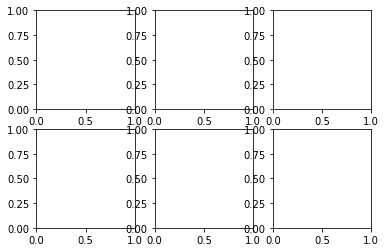

In [276]:
fig, axes = plt.subplots(2,3)


In [277]:
print(df_p)

      num_people_enrolled  total_class_size class_number         term  \
0                    44.0                99      CSCI005    FALL 2004   
1                    39.0                99      CSCI005    FALL 2004   
2                    39.0                99      CSCI005    FALL 2004   
3                    41.0                99      CSCI005    FALL 2004   
4                   163.0               400      CSCI005    FALL 2004   
5                     7.0                16      CSCI050    FALL 2004   
6                    14.0                30      CSCI051    FALL 2004   
7                    13.0                30      CSCI051    FALL 2004   
8                    10.0                30      CSCI052    FALL 2004   
9                    36.0                42      CSCI060    FALL 2004   
10                   35.0                42      CSCI060    FALL 2004   
11                   17.0                20      CSCI070    FALL 2004   
12                   11.0                20      CS